### 1. Importing necessary libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  

### 2. Reading dataset

In [2]:
# reading csv datasetusing pandas
df = pd.read_csv("heart_disease_df.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,SleepTime,Sex,Asthma,GenHealth,Diabetic,KidneyDisease
0,No,16.60,Yes,No,No,3,30,5,Female,Yes,Very good,Yes,No
1,No,20.34,No,No,Yes,0,0,7,Female,No,Very good,No,No
2,No,26.58,Yes,No,No,20,30,8,Male,Yes,Fair,Yes,No
3,No,24.21,No,No,No,0,0,6,Female,No,Good,No,No
4,No,23.71,No,No,No,28,0,8,Female,No,Very good,No,No


### 3. Data preprocessing

In [3]:
df.info()    #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HeartDisease     5019 non-null   object 
 1   BMI              5017 non-null   float64
 2   Smoking          5020 non-null   object 
 3   AlcoholDrinking  5020 non-null   object 
 4   Stroke           5020 non-null   object 
 5   PhysicalHealth   5020 non-null   int64  
 6   MentalHealth     5020 non-null   int64  
 7   SleepTime        5020 non-null   int64  
 8   Sex              5020 non-null   object 
 9   Asthma           5020 non-null   object 
 10  GenHealth        5020 non-null   object 
 11  Diabetic         5020 non-null   object 
 12  KidneyDisease    5020 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 510.0+ KB


In [4]:
# checking for the nan/null values in dataset
df.isna().head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,SleepTime,Sex,Asthma,GenHealth,Diabetic,KidneyDisease
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df['GenHealth'].unique()   #unique values in the column

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [6]:
df['BMI'].nunique()  #total count of unique values in the column

1210

In [7]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,SleepTime,Sex,Asthma,GenHealth,Diabetic,KidneyDisease
0,No,16.60,Yes,No,No,3,30,5,Female,Yes,Very good,Yes,No
1,No,20.34,No,No,Yes,0,0,7,Female,No,Very good,No,No


In [8]:
# to check if there are any null values in dataset
df.isna().sum()

HeartDisease       1
BMI                3
Smoking            0
AlcoholDrinking    0
Stroke             0
PhysicalHealth     0
MentalHealth       0
SleepTime          0
Sex                0
Asthma             0
GenHealth          0
Diabetic           0
KidneyDisease      0
dtype: int64

In [9]:
df['BMI'].isna().sum()   #count total number of nan/null values in the column

3

In [10]:
df['BMI'].describe()

count    5017.000000
mean       29.215792
std         6.605946
min        12.480000
25%        24.550000
50%        28.190000
75%        32.890000
max        75.820000
Name: BMI, dtype: float64

In [11]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)    #fill null values with mean value

In [12]:
df['BMI'].isna().sum()   #final check for null values 

0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
Sex = le.fit_transform(df['Sex'])
HeartDisease = le.fit_transform(df['HeartDisease'])
Smoking = le.fit_transform(df['Smoking'])
AlcoholDrinking = le.fit_transform(df['AlcoholDrinking'])
Stroke = le.fit_transform(df['Stroke'])
Asthma = le.fit_transform(df['Asthma'])
GenHealth = le.fit_transform(df['GenHealth'])
KidneyDisease = le.fit_transform(df['KidneyDisease'])

converting categorical data into numerical data

In [15]:
df.drop(labels = ["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", "Sex", "Asthma", "GenHealth", "Diabetic", "KidneyDisease"], axis=1, inplace=True)

In [16]:
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3,30,5
1,20.34,0,0,7
2,26.58,20,30,8
3,24.21,0,0,6
4,23.71,28,0,8


In [17]:
df['Sex'] = Sex
df['Smoking'] = Smoking
df['AlcoholDrinking'] = AlcoholDrinking
df['Stroke'] = Stroke
df['Asthma'] = Asthma
df['GenHealth'] = GenHealth
df['KidneyDisease'] = KidneyDisease
df['HeartDisease'] = HeartDisease

In [18]:
df.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,Asthma,GenHealth,KidneyDisease,HeartDisease
0,16.60,3,30,5,0,1,0,0,1,4,0,0
1,20.34,0,0,7,0,0,0,1,0,4,0,0


In [19]:
df.drop(labels = ['PhysicalHealth', 'MentalHealth'], axis = 1, inplace=True)

In [20]:
df.head()

,BMI,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,Asthma,GenHealth,KidneyDisease,HeartDisease
0,16.60,5,0,1,0,0,1,4,0,0
1,20.34,7,0,0,0,1,0,4,0,0
2,26.58,8,1,1,0,0,1,1,0,0
3,24.21,6,0,0,0,0,0,2,0,0
4,23.71,8,0,0,0,0,0,4,0,0


### 4. Data visualizstion

,Stroke,HeartDisease
0,0,0.090392
1,1,0.372263


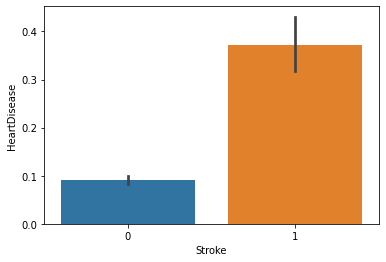

In [21]:
# barplot of heart disease with respect to Heartdisease
sns.barplot(x='Stroke',y='HeartDisease',data=df)
df.groupby('Stroke',as_index=False).HeartDisease.mean()

Heart disease is directly proportional to stroke

,Smoking,HeartDisease
0,0,0.074930
1,1,0.146488


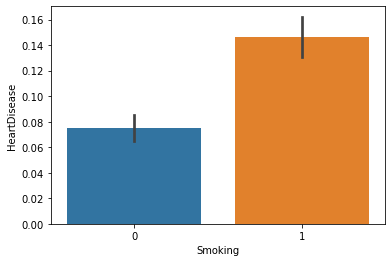

In [22]:
# barplot of heart disease with respect to smoking
sns.barplot(x='Smoking',y='HeartDisease',data=df)
df.groupby('Smoking',as_index=False).HeartDisease.mean()

,KidneyDisease,HeartDisease
0,0,0.096680
1,1,0.294372


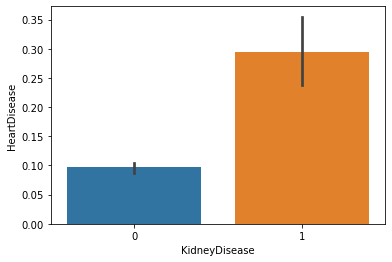

In [23]:
# barplot of heart disease with respect to smoking
sns.barplot(x='KidneyDisease',y='HeartDisease',data=df)
df.groupby('KidneyDisease',as_index=False).HeartDisease.mean()

Heart disease is directly proportional to KidneyDisease

### 5. Build primary model

In [24]:
# feature and target speration using iloc
target = df.iloc[ : , -1: ]
features = df.iloc[ : , :9 ]

In [25]:
target.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [26]:
features.head()

,BMI,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,Asthma,GenHealth,KidneyDisease
0,16.60,5,0,1,0,0,1,4,0
1,20.34,7,0,0,0,1,0,4,0
2,26.58,8,1,1,0,0,1,1,0
3,24.21,6,0,0,0,0,0,2,0
4,23.71,8,0,0,0,0,0,4,0


##### Train test split

In [27]:
# splitting the dataset into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

##### Implementing Logistic regression

In [28]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# prediction of test data

y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       902
           1       0.55      0.06      0.11       102

    accuracy                           0.90      1004
   macro avg       0.72      0.53      0.53      1004
weighted avg       0.87      0.90      0.86      1004



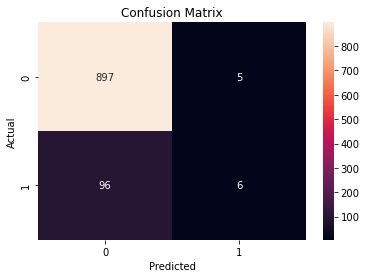

In [30]:
#Confusion matrix and classification report
from sklearn import metrics 
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred_lr))

From above confusion matrix,

true predicted out of actual true data = TP = 6, 
true predicted out of actual false data = FP = 5, 
false predicted out of acttual true data = FN = 96, 
false predicted out of actual false data = TN = 897

In [31]:
lr_score = lr.score(X_test, y_test)
lr_score

0.899402390438247

##### Implementing KNN algorithm

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       902
           1       0.19      0.04      0.07       102

    accuracy                           0.89      1004
   macro avg       0.55      0.51      0.50      1004
weighted avg       0.83      0.89      0.85      1004



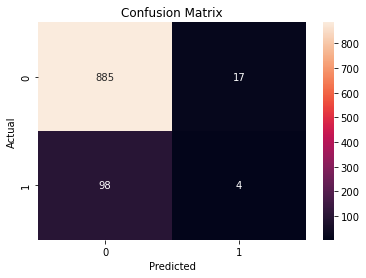

In [32]:
#importing the knn from sklearn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test,y_pred_knn))

From above confusion matrix,

true predicted out of actual true data = TP = 4, 
true predicted out of actual false data = FP = 17, 
false predicted out of acttual true data = FN = 98, 
false predicted out of actual false data = TN = 885

In [33]:
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
knn_score = knn.score(X_test, y_test)
knn_score

0.8854581673306773

### 6. Cross-Validation and Hyper-parameter tuning

In [35]:
# CV for logistic regression

# importing gridsearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_cv = GridSearchCV(LogisticRegression(), param_grid, cv = 3)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [36]:
lr_cv.best_params_

{'C': 100}

In [37]:
lr_cv.best_score_

0.89367571974564

In [38]:
# CV for knn
# importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(1,70)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=3)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])})

In [39]:
knn_cv.best_score_

0.8936753476350324

In [40]:
knn_cv.best_params_

{'n_neighbors': 12}

### 7. Feature Selection

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# select features according to the k highest scores
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target) # Run score function on (X, y) and get the appropriate features.

In [42]:
# Storing features and their score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
features_scores

,Features,Scores
0,BMI,9.137862
1,SleepTime,0.134435
2,Sex,16.791953
3,Smoking,39.185185
4,AlcoholDrinking,5.198772
5,Stroke,207.043532
6,Asthma,11.784134
7,GenHealth,1.965770
8,KidneyDisease,87.550353


In [43]:
df.head()

,BMI,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,Asthma,GenHealth,KidneyDisease,HeartDisease
0,16.60,5,0,1,0,0,1,4,0,0
1,20.34,7,0,0,0,1,0,4,0,0
2,26.58,8,1,1,0,0,1,1,0,0
3,24.21,6,0,0,0,0,0,2,0,0
4,23.71,8,0,0,0,0,0,4,0,0


In [44]:
df.drop(labels = ["SleepTime","AlcoholDrinking","GenHealth"], axis = 1, inplace=True)

In [45]:
df.head()

,BMI,Sex,Smoking,Stroke,Asthma,KidneyDisease,HeartDisease
0,16.60,0,1,0,1,0,0
1,20.34,0,0,1,0,0,0
2,26.58,1,1,0,1,0,0
3,24.21,0,0,0,0,0,0
4,23.71,0,0,0,0,0,0


### 8. Final Model

In [46]:
df.head()

,BMI,Sex,Smoking,Stroke,Asthma,KidneyDisease,HeartDisease
0,16.60,0,1,0,1,0,0
1,20.34,0,0,1,0,0,0
2,26.58,1,1,0,1,0,0
3,24.21,0,0,0,0,0,0
4,23.71,0,0,0,0,0,0


In [47]:
feature_final = df.iloc[ : , :-1 ]
target_final = df.iloc[ : , -1: ]

In [48]:
feature_final

,BMI,Sex,Smoking,Stroke,Asthma,KidneyDisease
0,16.60,0,1,0,1,0
1,20.34,0,0,1,0,0
2,26.58,1,1,0,1,0
3,24.21,0,0,0,0,0
4,23.71,0,0,0,0,0
...,...,...,...,...,...,...
5015,29.95,0,1,0,0,0
5016,25.02,0,1,0,0,0
5017,36.58,0,0,0,0,0
5018,29.18,0,0,0,0,0


In [49]:
target_final

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
5015,0
5016,0
5017,1
5018,0


In [50]:
# train test split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(feature_final, target_final, test_size=0.2, random_state=42)

In [51]:
# logistic regression final model
lr_final  = LogisticRegression(C=100)
lr_final.fit(X_train_final, y_train_final)

LogisticRegression(C=100)

In [52]:
y_pred_lr_final = lr_final.predict(X_test_final)
y_pred_lr_final

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       902
           1       0.55      0.06      0.11       102

    accuracy                           0.90      1004
   macro avg       0.72      0.53      0.53      1004
weighted avg       0.87      0.90      0.86      1004



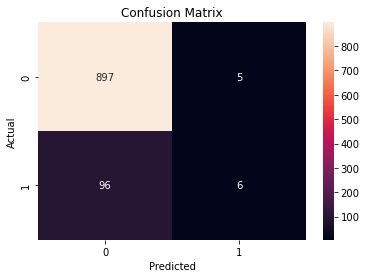

In [53]:
matrix = confusion_matrix(y_test_final, y_pred_lr_final)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test_final, y_pred_lr_final))

From above confusion matrix,

true predicted out of actual true data = TP = 6, 
true predicted out of actual false data = FP = 5, 
false predicted out of acttual true data = FN = 96, 
false predicted out of actual false data = TN = 897

In [54]:
lr_final_score = lr_final.score(X_test_final, y_test_final)
lr_final_score

0.899402390438247

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       902
           1       0.00      0.00      0.00       102

    accuracy                           0.90      1004
   macro avg       0.45      0.50      0.47      1004
weighted avg       0.81      0.90      0.85      1004



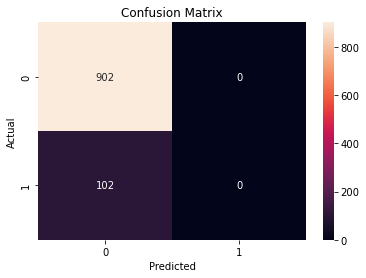

In [55]:
# knn algorithm final
knn_final = KNeighborsClassifier(n_neighbors = 12)
knn_final.fit(X_train_final, y_train_final)
y_pred_knn_final = knn_final.predict(X_test_final)

matrix = confusion_matrix(y_test_final, y_pred_knn_final)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test_final,y_pred_knn_final))

From above confusion matrix,

true predicted out of actual true data = TP = 0, 
true predicted out of actual false data = FP = 0, 
false predicted out of acttual true data = FN = 102, 
false predicted out of actual false data = TN = 902

In [56]:
knn_final_score = knn_final.score(X_test_final, y_test_final)
knn_final_score

0.898406374501992

### 9. Conclusion

In [57]:
x_index = ['Logistic Regression' , 'KNN']
model_accuracy = {
    'Normal Accuracy' : [lr_score, knn_score],
    'Accuracy after CV and Hyperparameter tuning' : [lr_cv.best_score_, knn_cv.best_score_],
    'Final Model Accuracy' : [lr_final_score, knn_final_score]
}
accuracy_df = pd.DataFrame(model_accuracy, index = x_index)
accuracy_df

,Normal Accuracy,Accuracy after CV and Hyperparameter tuning,Final Model Accuracy
Logistic Regression,0.899402,0.893676,0.899402
KNN,0.885458,0.893675,0.898406
